In [1]:
###SASSIE SWIFT DATA USE AND VISUALIZATION##
import numpy as np
import xarray as xr
import glob 
from datetime import datetime, timedelta 
import matplotlib.pyplot as plt
import cartopy
import matplotlib
import os
import sys
import pandas as pd

#local directory where the TSG data is stored
dir_in = '/Users/westbrooke/Library/CloudStorage/OneDrive-UNC-Wilmington/SASSIE/L2/uCTD/'

#local directory where figures will be saved
fig_dir = '/Users/westbrooke/Library/CloudStorage/OneDrive-UNC-Wilmington/SASSIE/communication/notebooks_images/uCTD/'
if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)

#play start and end dates  
play1_start = datetime(2022,9,8,8) 
play1_end = datetime(2022,9,13)
play2_start = datetime(2022,9,14)
play2_end = datetime(2022,9,16)
play3_start = datetime(2022,9,16)
play3_end = datetime(2022,9,18)
play4_start = datetime(2022,9,19)
play4_end  = datetime(2022,9,23)
play5_start = datetime(2022,9,25)
play5_end = datetime(2022,9,29)

play_start_dates = [play1_start,play2_start,play3_start,play4_start,play5_start,play1_start]
play_end_dates = [play1_end,play2_end,play3_end,play4_end,play5_end,play5_end]

In [2]:
##LOAD IN THE NETCDF FILES AND LOOK AT THEIR METADATA  
file = (dir_in + 'SASSIE_Fall_2022_shipboard_underwayCTD.nc')
    
#SHOWS THE GLOBAL METEADATA AND WHICH VARIABLES ARE IN THE FILE
ds = xr.open_dataset(file)
#print(ds)

#SHOW THE VARIABLE ATTRIBUTES FOR ANY GIVEN VARIABLE WITHIN THE FILE. Replace "salinity" with your variable of interest:
variable_info = ds.salinity
#print(variable_info)

In [3]:
def define_variable_attributes(var):
    if var =='salinity':
        colormap = 'viridis'
        var_label = 'Salinity'
    if var =='temperature':
        colormap = 'plasma'
        var_label = 'Water Temperature ($^{\circ}$C)'
    return colormap,var_label

In [4]:
#PLOT THE LOCATION OF THE CTD CASTS ON THE SHIP TRACK 
def map_cast_location():

    #LOAD SHIP TRACK DATA
    ds_ship = xr.open_dataset('/Users/westbrooke/Library/CloudStorage/OneDrive-UNC-Wilmington/SASSIE/L2/TSG/SASSIE_Fall_2022_Shipboard_TSG.nc')
    ship_time = np.squeeze(ds_ship['time'])
    ship_lat = np.squeeze(ds_ship['latitude'])
    ship_lon = np.squeeze(ds_ship['longitude'])
    
    #LOAD UCTD DATA
    uCTD_time = np.squeeze(ds['time'])
    uCTD_lat = np.squeeze(ds['latitude'])
    uCTD_lon = np.squeeze(ds['longitude'])
    
    
    ##CREATE A MAP WITH LAND AND CITY MARKERS  
    latmin = 70
    latmax =74
    lonmin=-157
    lonmax=-144
    
    fig = plt.figure(figsize=(10,8))
    ax = plt.axes(projection=cartopy.crs.NorthPolarStereo(central_longitude=-150))
    ax.set_extent([lonmin,lonmax,latmin,latmax], crs=cartopy.crs.PlateCarree())
    ax.coastlines(color='k')  
    ax.add_feature(cartopy.feature.LAND, facecolor = '0.50')
    ax.add_feature(cartopy.feature.RIVERS,facecolor='blue')

    
    gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.3) 
    ax.set_title('uCTD Deployment Locations',fontsize=22,pad=1) 
    gl.ylocator = matplotlib.ticker.FixedLocator(np.arange(60,75,1))
    gl.xlocator = matplotlib.ticker.FixedLocator(np.arange(-170,-140,2))
    gl.top_labels = False
    gl.bottom_labels = True
    gl.right_labels = False
    
    if (latmin<71.2906) & (lonmin<-156.7886):
        utqiagvik = ax.scatter(-156.7886,71.2906,s=100,transform=cartopy.crs.PlateCarree(),c='red',marker = '*',label='Utqiagvik, AK',zorder=2)
    if (latmin<70.2002) & (lonmax>-148.4597):
        deadhorse = ax.scatter(-148.4597,70.2002,s=100,c='cyan',transform=cartopy.crs.PlateCarree(),marker = '*',label='Deadhorse, AK',zorder=2)
    plt.legend(loc=2)
    
    
    ##APPLY SHIP DATA
    track = ax.plot(ship_lon, 
                 ship_lat,linewidth = 0.5,
                 c='black',
                   transform=cartopy.crs.PlateCarree(),label = 'Ship Track',zorder=1)
    plt.legend(loc=2)
    
    
    #uCTD locations
    casts = ax.scatter(uCTD_lon,uCTD_lat,s = 10,
                       c = uCTD_time,cmap = 'jet',
                       transform=cartopy.crs.PlateCarree(),zorder=2,
                      vmin=min(uCTD_time.values), vmax=max(uCTD_time.values))
                        
    cbar = fig.colorbar(casts, ax=ax, orientation="horizontal", pad=0.1)
    cbar.set_label(label='Date',size='large',weight='bold')
    cbar_tick_array=(np.linspace(ds['time'].values[0].astype('int64'),ds['time'].values[-1].astype('int64'),5))
    cbar.set_ticks(cbar_tick_array)
    cbar.set_ticklabels(pd.to_datetime(cbar_tick_array).date)
    
    ##SAVE FIGURE 
    if not os.path.exists(fig_dir+'deployment_map/'):
        os.makedirs(fig_dir+'deployment_map/')
    
    print('Saving Output Image:  '+fig_dir+'deployment_map/uCTD_deployment_map.png')
    plt.savefig(fig_dir+'deployment_map/uCTD_deployment_map.png',dpi='figure',format='png')
    
    


Saving Output Image:  /Users/westbrooke/Library/CloudStorage/OneDrive-UNC-Wilmington/SASSIE/communication/notebooks_images/uCTD/deployment_map/uCTD_deployment_map.png


/Users/westbrooke/opt/anaconda3/envs/SASSIE_Data/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


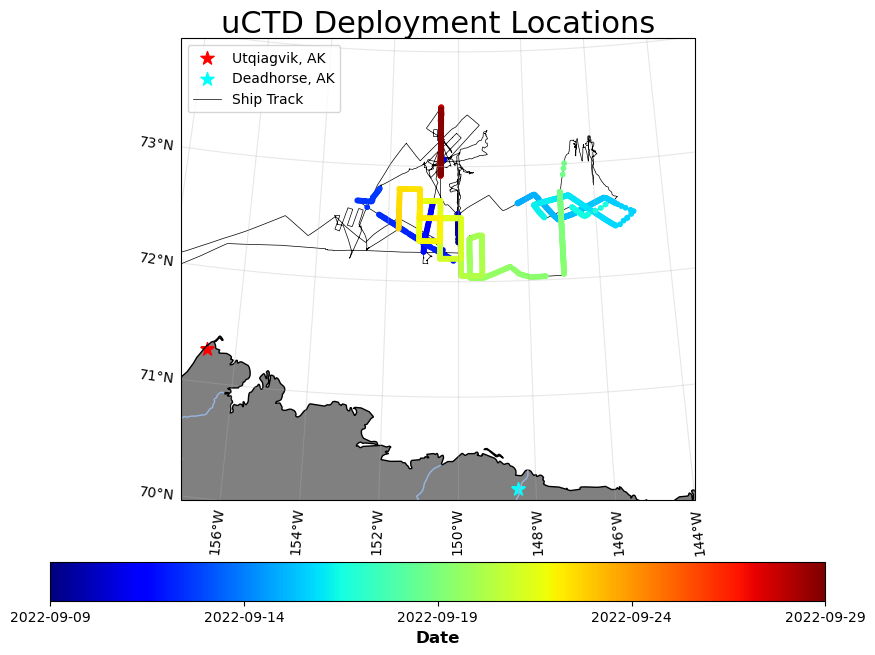

In [5]:
map_cast_location()

In [6]:
##USE TO PLOT THE PROFILES TAKEN WITHIN A DATE RANGE 
def uCTD_profiles(start_date,end_date,var):
    
    #GET UCTD DATA
    selected_casts = ds.sel(time=slice(start_date,end_date))
    CTD_lat = selected_casts['latitude']
    CTD_lon = selected_casts['longitude']
    CTD_pres = selected_casts['pressure']
    CTD_var = selected_casts[var]
    
    [lat,pres] = np.meshgrid(CTD_lat,CTD_pres)
    [lon,pres] = np.meshgrid(CTD_lon,CTD_pres)
    
    #LOAD SHIP TRACK DATA
    ds_ship_all = xr.open_dataset('/Users/westbrooke/Library/CloudStorage/OneDrive-UNC-Wilmington/SASSIE/L2/TSG/SASSIE_Fall_2022_Shipboard_TSG.nc')
    ds_ship = ds.sel(time=slice(start_date,end_date))
    ship_time = np.squeeze(ds_ship['time'])
    ship_lat = np.squeeze(ds_ship['latitude'])
    ship_lon = np.squeeze(ds_ship['longitude'])

    ##CREATE 3D PLOT 
    colormap,var_label = define_variable_attributes(var)

    #To show the whole campaign area, use latmin = 70, latmax =74,lonmin=-157,lonmax=-140
    latmin = min(CTD_lat.values)
    latmax = max(CTD_lat.values)
    lonmin = min(CTD_lon.values)
    lonmax = max(CTD_lon.values)
    pmin = min(CTD_pres.values)
    pmax = max(CTD_pres.values)+0.5
    
      
    fig = plt.figure(figsize=(10,8))
    ax = plt.axes(projection='3d',computed_zorder=False)
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False    
    
    ax.set_title('uCTD'+' '+var_label+' '+'Readings from'+' '+str(start_date.year)+'/'+str(start_date.month).zfill(2)+'/'+str(start_date.day).zfill(2)+' '+str(start_date.hour).zfill(2)+':'+str(start_date.minute).zfill(2)+' to '+str(end_date.year)+'/'+str(end_date.month).zfill(2)+'/'+str(end_date.day).zfill(2)+' '+str(end_date.hour).zfill(2)+':'+str(end_date.minute).zfill(2),fontsize=15,pad=None)

    ax.set_xlim(lonmin, lonmax); ax.set_ylim(latmin,latmax); ax.set_zlim(pmin,pmax);
    ax.get_xaxis().get_major_formatter().set_useOffset(False)
    xticks = list(np.linspace(lonmin,lonmax,4))
    ax.set_xticks(np.around(xticks,2))
    yticks = list(np.linspace(latmin,latmax,4))
    ax.set_yticks(np.around(yticks,2))
    zticks = list(np.linspace(pmin,pmax,4))
    ax.set_zticks(np.around(zticks,2))
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_zlabel('Pressure (dbar)')
    ax.view_init(210,60)

        
    ##APPLY CTD DATA   
    a = ax.scatter(lon,lat,pres,c=(CTD_var.values),cmap = colormap,s=2,zorder=1)    
    fig.colorbar(a,label = var_label)
    
    ##ADD SHIP TRACK 
    track = ax.scatter(ship_lon, 
                 ship_lat,s=5,
                 c='black',label = 'Ship Track',zorder=1)
    
    
    ## SAVE THE FIGURE
    if not os.path.exists(fig_dir+var+'/'):
        os.makedirs(fig_dir+var+'/')
    
    print('Saving Output Image:  '+fig_dir+var+'/'+'uCTD'+var+str(start_date.year)+str(start_date.month).zfill(2)+str(start_date.day).zfill(2)+str(start_date.hour).zfill(2)+str(start_date.minute).zfill(2)+'_'+str(end_date.year)+str(end_date.month).zfill(2)+str(end_date.day).zfill(2)+str(end_date.hour).zfill(2)+str(end_date.minute).zfill(2)+'.png')
    plt.savefig(fig_dir+var+'/'+'uCTD'+var+str(start_date.year)+str(start_date.month).zfill(2)+str(start_date.day).zfill(2)+str(start_date.hour).zfill(2)+str(start_date.minute).zfill(2)+'_'+str(end_date.year)+str(end_date.month).zfill(2)+str(end_date.day).zfill(2)+str(end_date.hour).zfill(2)+str(end_date.minute).zfill(2)+'.png',dpi='figure',format='png')
    

Saving Output Image:  /Users/westbrooke/Library/CloudStorage/OneDrive-UNC-Wilmington/SASSIE/communication/notebooks_images/uCTD/temperature/uCTDtemperature202209080800_202209130000.png
Saving Output Image:  /Users/westbrooke/Library/CloudStorage/OneDrive-UNC-Wilmington/SASSIE/communication/notebooks_images/uCTD/temperature/uCTDtemperature202209140000_202209160000.png
Saving Output Image:  /Users/westbrooke/Library/CloudStorage/OneDrive-UNC-Wilmington/SASSIE/communication/notebooks_images/uCTD/temperature/uCTDtemperature202209160000_202209180000.png
Saving Output Image:  /Users/westbrooke/Library/CloudStorage/OneDrive-UNC-Wilmington/SASSIE/communication/notebooks_images/uCTD/temperature/uCTDtemperature202209190000_202209230000.png
Saving Output Image:  /Users/westbrooke/Library/CloudStorage/OneDrive-UNC-Wilmington/SASSIE/communication/notebooks_images/uCTD/temperature/uCTDtemperature202209250000_202209290000.png


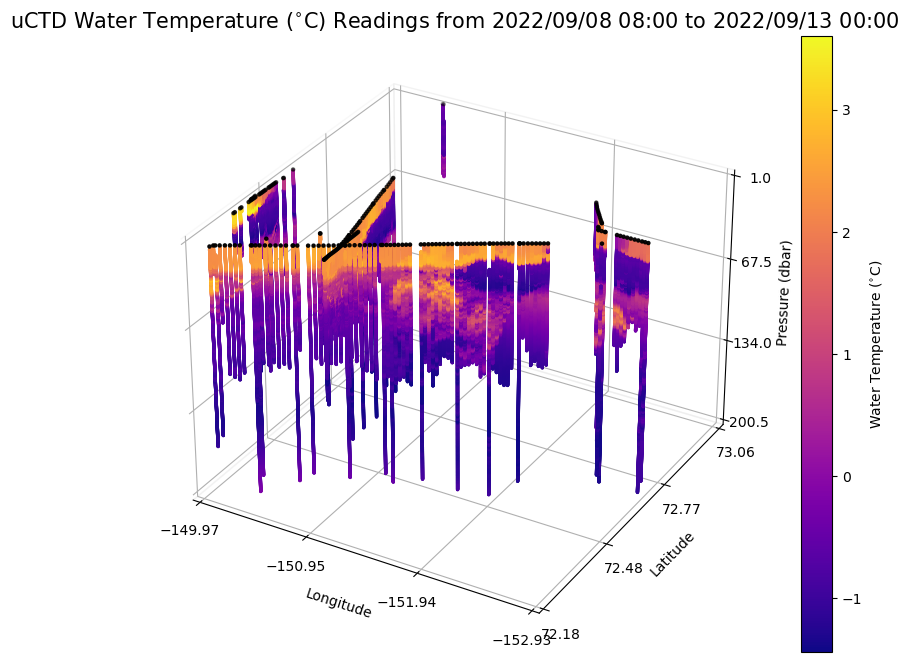

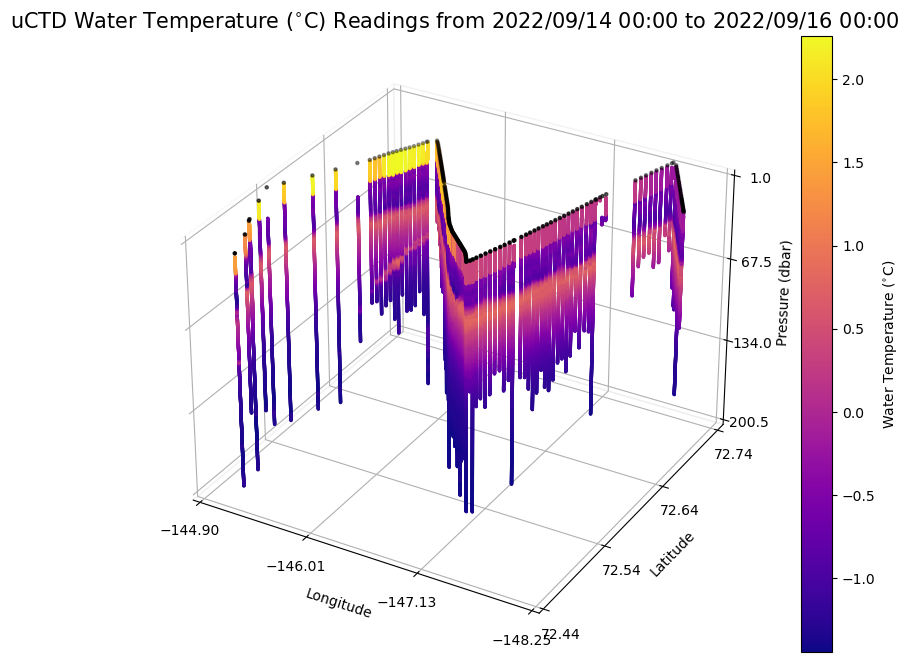

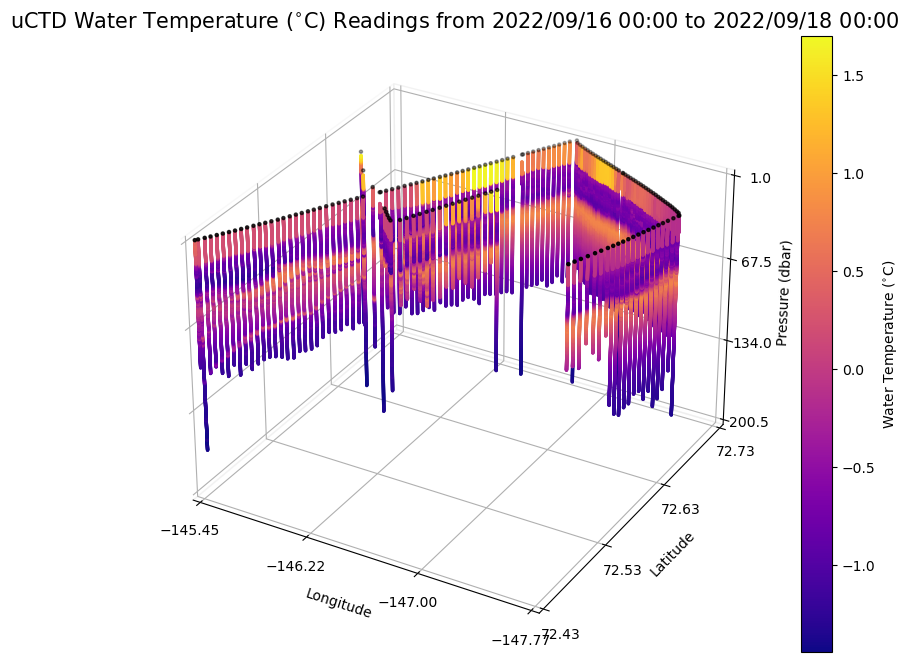

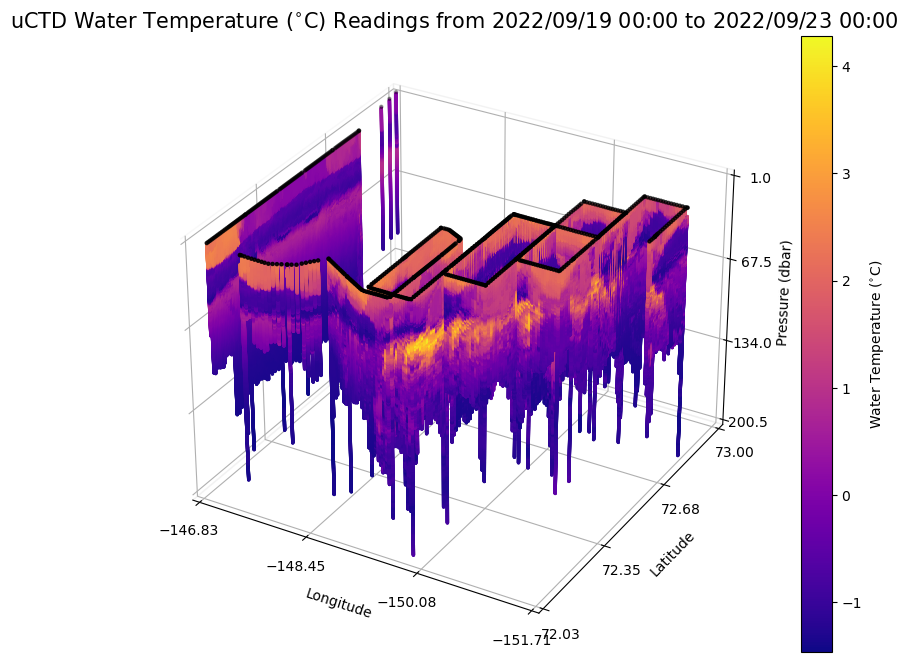

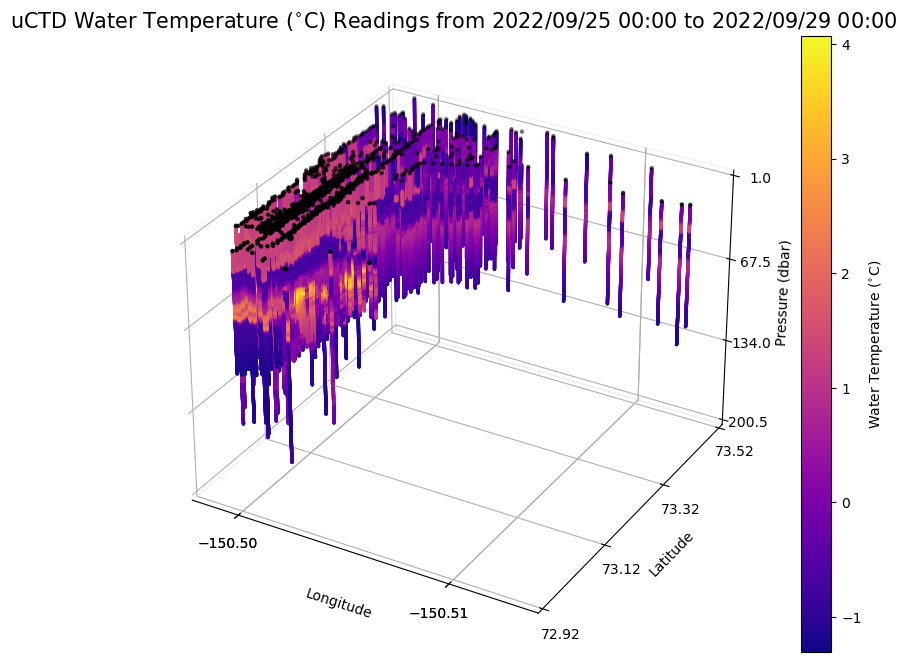

In [7]:
uCTD_profiles(play1_start,play1_end,'temperature')
uCTD_profiles(play2_start,play2_end,'temperature')
uCTD_profiles(play3_start,play3_end,'temperature')
uCTD_profiles(play4_start,play4_end,'temperature')
uCTD_profiles(play5_start,play5_end,'temperature')

Saving Output Image:  /Users/westbrooke/Library/CloudStorage/OneDrive-UNC-Wilmington/SASSIE/communication/notebooks_images/uCTD/salinity/uCTDsalinity202209080800_202209130000.png
Saving Output Image:  /Users/westbrooke/Library/CloudStorage/OneDrive-UNC-Wilmington/SASSIE/communication/notebooks_images/uCTD/salinity/uCTDsalinity202209140000_202209160000.png
Saving Output Image:  /Users/westbrooke/Library/CloudStorage/OneDrive-UNC-Wilmington/SASSIE/communication/notebooks_images/uCTD/salinity/uCTDsalinity202209160000_202209180000.png
Saving Output Image:  /Users/westbrooke/Library/CloudStorage/OneDrive-UNC-Wilmington/SASSIE/communication/notebooks_images/uCTD/salinity/uCTDsalinity202209190000_202209230000.png
Saving Output Image:  /Users/westbrooke/Library/CloudStorage/OneDrive-UNC-Wilmington/SASSIE/communication/notebooks_images/uCTD/salinity/uCTDsalinity202209250000_202209290000.png


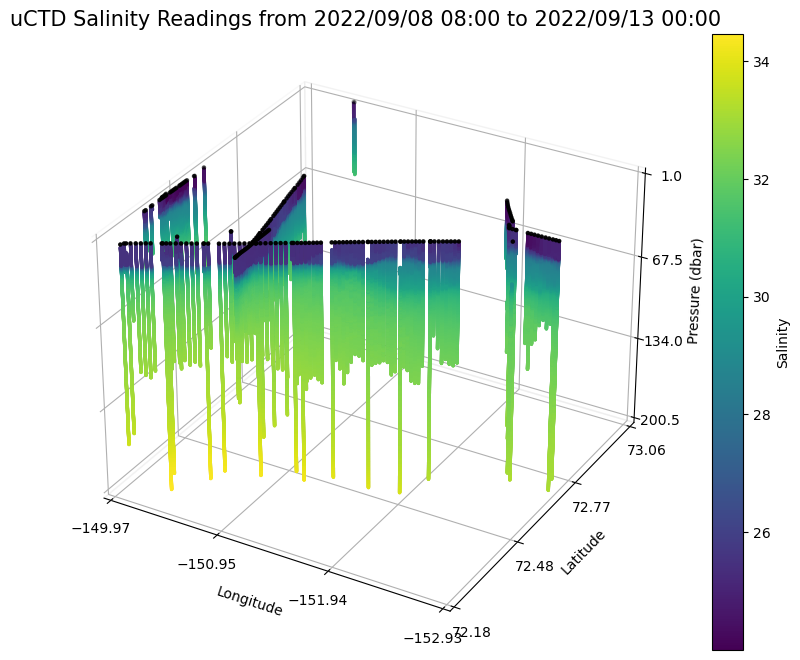

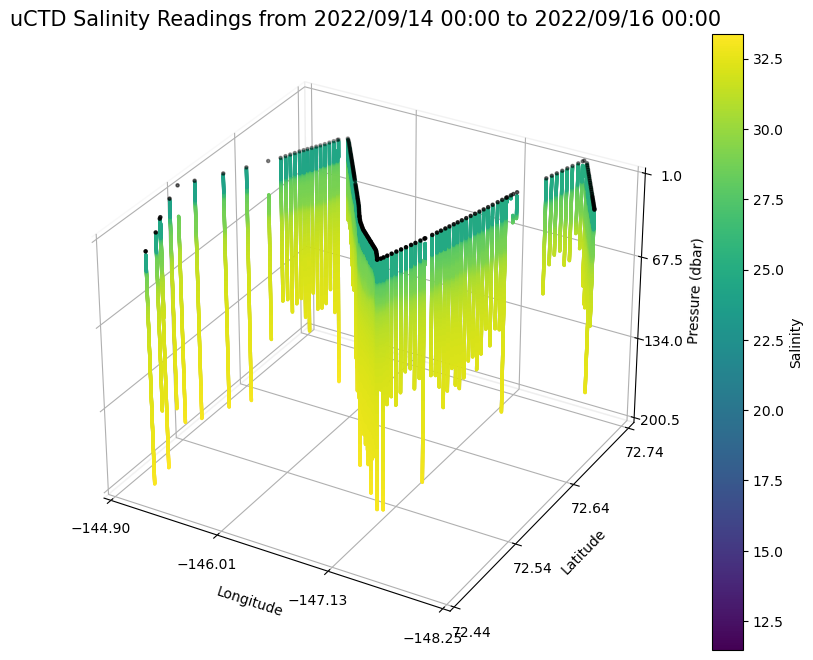

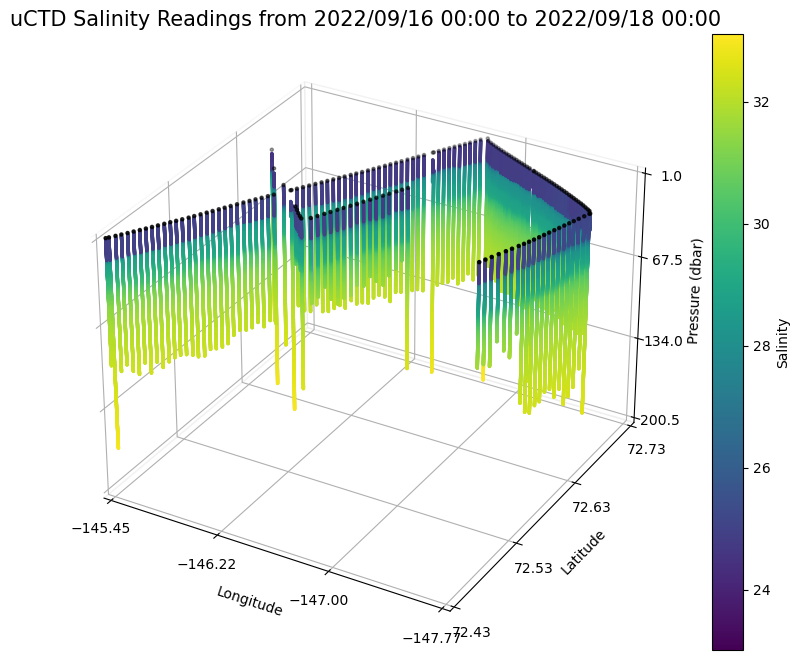

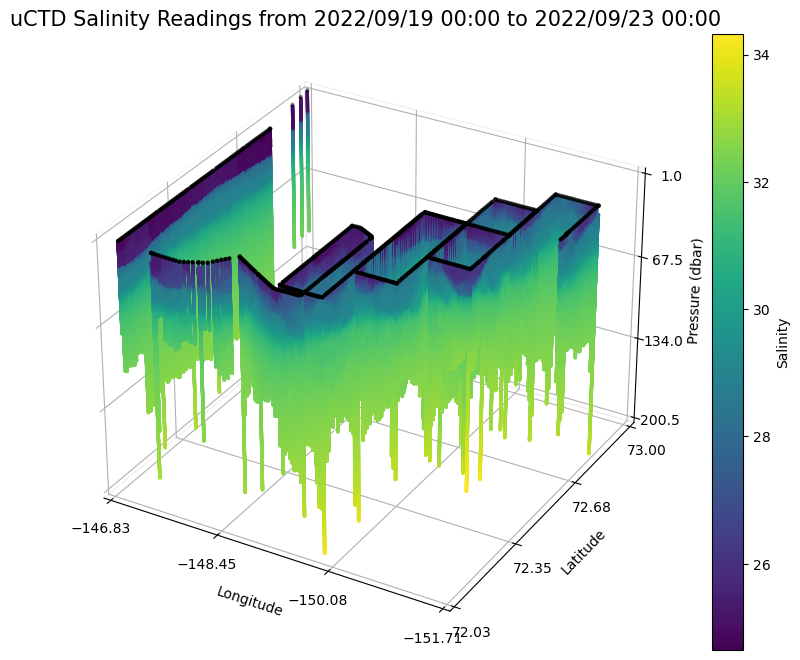

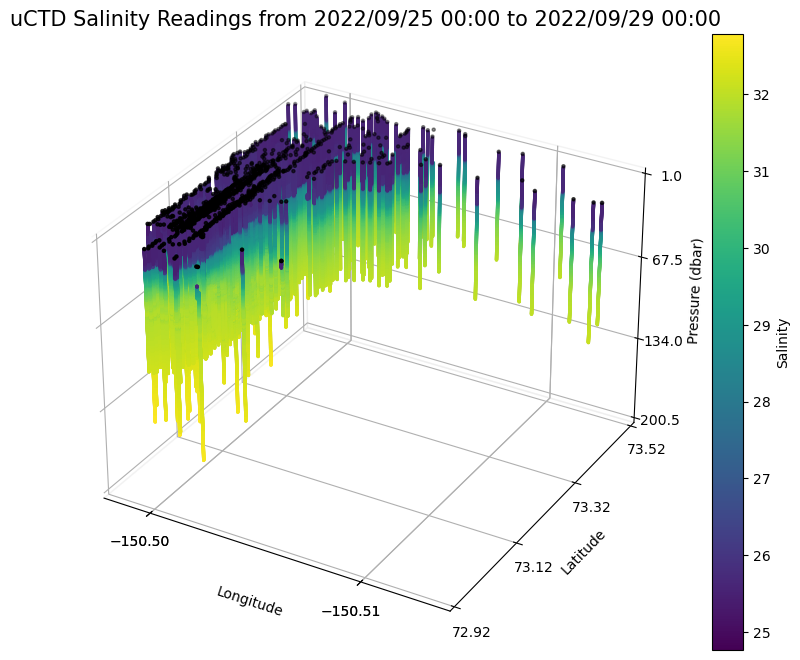

In [8]:
uCTD_profiles(play1_start,play1_end,'salinity')
uCTD_profiles(play2_start,play2_end,'salinity')
uCTD_profiles(play3_start,play3_end,'salinity')
uCTD_profiles(play4_start,play4_end,'salinity')
uCTD_profiles(play5_start,play5_end,'salinity')

In [9]:
##USE TO PLOT AN INDIVIDUAL CAST BY CAST NUMBER 
def plot_cast_profile_by_index(cast_number):
    
    #LOAD uCTD DATA 
    uCTD_sal = np.squeeze(ds['salinity'].values[:,cast_number])
    uCTD_temp = np.squeeze(ds['temperature'].values[:,cast_number])
    uCTD_pres = np.squeeze(ds['pressure'].values)
    uCTD_time = np.squeeze(ds['time'].values[cast_number]).astype('int64')
    
    ## PLOT THE DATA
    fig,axs = plt.subplots(1,2,sharey=True)
    axs[0].plot(uCTD_temp,uCTD_pres,linewidth=0.4,c='black')
    axs[0].invert_yaxis()
    #axs[0].set_title('Water Temperature ($^{\circ}$C)')
    axs[0].set_xlabel('Temperature ($^{\circ}$C)')
    axs[0].set_ylabel('Pressure (dbar)')
    axs[1].plot(uCTD_sal,uCTD_pres,linewidth=0.4,c='black')
    #axs[1].set_title('Salinity')
    axs[1].set_xlabel('Salinity')
    fig.suptitle('uCTD Profiles from Cast '+str(cast_number)+' on '+str(pd.to_datetime(uCTD_time).year).zfill(2)+'/'+str(pd.to_datetime(uCTD_time).month).zfill(2)+'/'+str(pd.to_datetime(uCTD_time).day).zfill(2)+' at '+str(pd.to_datetime(uCTD_time).hour)+':'+str(pd.to_datetime(uCTD_time).minute)+':'+str(pd.to_datetime(uCTD_time).second))
    
    ## SAVE THE FIGURE
    if not os.path.exists(fig_dir+'profiles/'):
        os.makedirs(fig_dir+'profiles/')
    print('Saving Output Image:  '+fig_dir+'profiles/'+'uCTD_profile'+str(cast_number)+'_'+str(pd.to_datetime(uCTD_time).year)+str(pd.to_datetime(uCTD_time).month).zfill(2)+str(pd.to_datetime(uCTD_time).day).zfill(2)+str(pd.to_datetime(uCTD_time).hour).zfill(2)+str(pd.to_datetime(uCTD_time).minute).zfill(2)+str(pd.to_datetime(uCTD_time).second).zfill(2)+'.png')
    plt.savefig(fig_dir+'profiles/'+'uCTD_profile'+str(cast_number)+'_'+str(pd.to_datetime(uCTD_time).year)+str(pd.to_datetime(uCTD_time).month).zfill(2)+str(pd.to_datetime(uCTD_time).day).zfill(2)+str(pd.to_datetime(uCTD_time).hour).zfill(2)+str(pd.to_datetime(uCTD_time).minute).zfill(2)+str(pd.to_datetime(uCTD_time).second).zfill(2)+'.png',dpi='figure',format='png')


Saving Output Image:  /Users/westbrooke/Library/CloudStorage/OneDrive-UNC-Wilmington/SASSIE/communication/notebooks_images/uCTD/profiles/uCTD_profile540_20220916181159.png


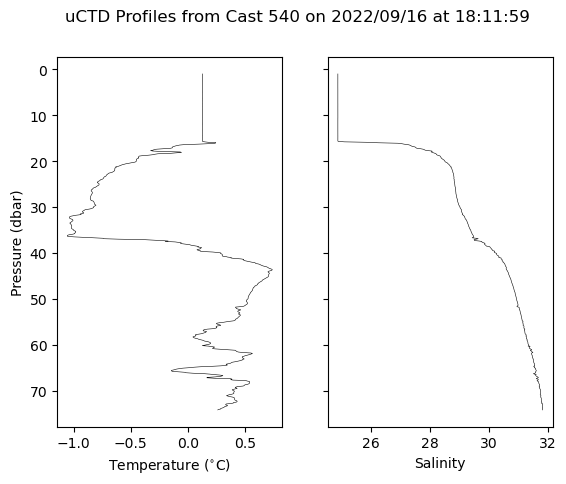

In [10]:
plot_cast_profile_by_index(540)